<a href="https://colab.research.google.com/github/kgum/2022_project/blob/main/56%EC%A3%BC%EC%B0%A8_%ED%83%80%ED%94%BC%EC%98%A4%EC%B9%B4_%EC%84%B1%EC%A0%81%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#성적 분석 프로그램
성적 파일에서 학생의 총점과 영역별 점수를 확인하는 프로그램입니다.  
학생이 문항별로 입력한 정답을 수합한 엑셀 파일에서, 문항별 정답 여부를 확인해 총점을 계산한 후 영역별 정답여부를 확인해 보충이 필요한 영역을 진단합니다.  
정답 입력은 구글폼이나 네이버폼 등 별도의 절차를 거쳐 엑셀 파일로 모을 수 있을 것 같습니다. 

In [ ]:
from google.colab import files
files.upload()

Saving 기록.csv to 기록.csv


{'기록.csv': b',\xb1\xe2\xc3\xca\xbf\xac\xbb\xea,\xb1\xe2\xc3\xca\xbf\xac\xbb\xea,\xb1\xe2\xc3\xca\xbf\xac\xbb\xea,\xb1\xe2\xc3\xca\xbf\xac\xbb\xea,\xb9\xae\xc0\xe5\xc1\xa6,\xb9\xae\xc0\xe5\xc1\xa6,\xb9\xae\xc0\xe5\xc1\xa6,\xb9\xae\xc0\xe5\xc1\xa6,\xbd\xc9\xc8\xad,\xbd\xc9\xc8\xad\r\n\xc1\xa4\xb4\xe4,1,5,3,2,4,1,2,3,1,1\r\n\xb1\xe8\xc0\xcf\xc0\xcf,1,2,3,2,4,1,2,3,1,1\r\n\xb9\xda\xc0\xcc\xc0\xcc,3,2,1,2,1,2,3,4,4,4\r\n\xc3\xd6\xbb\xef\xbb\xef,5,5,3,2,4,1,2,4,2,2\r\n\xb0\xad\xbb\xe7\xbb\xe7,1,5,3,2,4,1,2,3,1,4\r\n\xc1\xa4\xbf\xc0\xbf\xc0,1,5,3,2,1,1,2,3,2,3\r\n'}

In [ ]:
!apt-get install fonts-nanum -qq > /dev/null # 한글폰트설치
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


확인을 원하는 학생의 이름을 입력해주세요
입력해주세요 : 최삼삼
[총점]
최삼삼 학생의 점수는 60점 입니다
[점수 분석]
기초 연산:3/4
문장제:3/4
심화:0/2


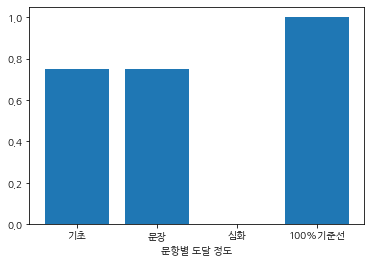

In [ ]:
import csv
data = csv.reader(open('기록.csv', encoding = 'cp949'))

#개별성적확인
re_case1 = []
re_case2 = []
for i in range (10) :
  re_case1.append([])
  re_case2.append([])


print('확인을 원하는 학생의 이름을 입력해주세요')
re_name = input('입력해주세요 : ')
next(data)
for row in data :
  if row[0] == '정답' :
    for i in range (10) :
      re_case1[i].append(row[i+1])
  elif row[0] == re_name :
    for i in range (10) :
      re_case2[i].append(row[i+1])
count = 0
for i in range (10) :
  if re_case1[i] == re_case2[i] :
    count = count + 1
print('[총점]')
print(re_name +' 학생의 점수는 ' + str(count * 10) + '점 입니다')
basic = 0
for i in range (0,4) :  
  if re_case1[i] == re_case2[i] :
    basic = basic + 1
sen = 0
for i in range (4,8) :
  if re_case1[i] == re_case2[i] :
    sen = sen + 1
har = 0
for i in range (8,10) :
  if re_case1[i] == re_case2[i] :
    har = har + 1
print('[점수 분석]')
print('기초 연산:' + str(basic) + '/4')
print('문장제:' + str(sen) + '/4')
print('심화:' + str(har) + '/2')

title = ['기초', '문장', '심화','100%기준선']

import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.bar([1,2,3,4],[(basic/4),(sen/4),(har/2),1])
plt.xlabel('문항별 도달 정도')
plt.xticks(np.arange(1,5), labels = title)
plt.show()  



